# STAT 207 Project 02 - Statistical Inference on Video Game Genres: Estimating Proportions and Comparing Hypothesis

JJ Park, James Lee, Woo In Shin

### Contribution Report

If you open this document, you should edit and complete the contribution report.  Please complete this report if you work individually, in a group and your submission is the one to be graded, or in a group but someone else should be graded.

In this contribution report below you should list of the following:
1. The netID for the project submission to be graded.  (Some groups have each member create their own version of the document, but only one needs to be submitted for grading.  Other groups have only one member compose and submit the project.)
2. Names and netIDs of each team member.
3. Contributions to report of each team member.

*For example:*

*<u>Teammates:</u>*

*doe105 should be graded.  John Smith (smith92) & Jane Doe (doe105) worked together on all parts of this project*, 

OR

*doe105 should be graded*

<i>1. John Smith (smith92) completed parts 1 - 3</i>

<i>2. Jane Doe (doe105) completed parts 4 - 5</i>

<i>We both reviewed the full document before submission.</i>

hosangl2 should be graded. JJ Park (jjp11) & James Lee (hosangl2) & Woo In (Emily) Shin (wishin2) worked together on all parts of this project

## 1. Introduction

The video game industry is a dynamic and rapidly evolving sector, where understanding the factors that drive a game’s success is crucial for developers and publishers. One of the key elements influencing game performance is its genre, shaping both the gameplay experience and its appeal to different player demographics. In this project, we extend our analysis of the relationship between video game genres and sales performance by using statistical inference methods to make conclusions about the broader gaming market.

The video_games.csv dataset contains information about over a thousand video games released between 2004 and 2010, including variables related to game sales, playtime, and genres. This dataset was crowd-sourced from “How Long to Beat” and curated by Dr. Joe Cox, offering a comprehensive view of how games perform across different platforms and genres. By analyzing the video_games.csv dataset, we will estimate a population parameter through confidence intervals and conduct hypothesis testing to explore potential relationships between game genres and key performance metrics such as sales and playtime. This research will help provide insights into how different genres perform in terms of sales and engagement, aiding developers and publishers in making informed decisions for future game development and marketing strategies.

The dataset represents a sample of video games released between 2004 and 2010, as it was collected from crowd-sourced data on the “How Long to Beat” platform. This means it does not include every video game released during that time period, only those for which users contributed playtime and sales data. The corresponding population of interest would be all video games released between 2004 and 2010 across various platforms, including those not represented in this dataset. For this project, since the dataset already represents a sample, we will perform analysis on this sample without further random sampling, treating it as representative of the larger population of video games during that period.

For Confidence Interval Analytical Tasks: What is the estimated proportion of games within a specific genre across platforms, and what are the reasonable values for this proportion in the broader population?

For Hypothesis Testing Analytical Tasks: Which of the two competing hypotheses for our population is more consistent with the evidence from the data in the sample?

Motivation: Understanding the proportion of games within a specific genre, such as action, can help game developers and marketers better predict the popularity of future game releases. Additionally, insights into whether playtime significantly differs between genres can guide game design strategies, allowing developers to create more engaging gameplay experiences tailored to player preferences. For instance, knowing that action games typically have longer playtimes may influence resource allocation towards developing longer, more immersive experiences for this genre.

In [44]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np

In [45]:
df = pd.read_csv("video_games.csv", encoding='unicode_escape')

In [46]:
df.head()

,Console,Title,US Sales (millions),Block4,Block2,Block1,Block0.5,YearReleased,2004,2005,...,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,1,1,1,1,2004,1,0,...,0,0,0,0,0,1,0,0,0,1
1,Sony PSP,Lumines: Puzzle Fusion,0.56,0,0,0,1,2004,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Nintendo DS,WarioWare Touched!,0.54,0,0,0,1,2004,1,0,...,0,0,0,0,0,1,1,1,1,1
3,Sony PSP,Hot Shots Golf: Open Tee,0.49,0,0,0,0,2004,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Nintendo DS,Spider-Man 2,0.45,0,0,0,0,2004,1,0,...,0,0,0,0,0,1,0,1,0,1


## 2. Confidence Interval Analytical Tasks

Research Question for Confidence Interval Analytical Tasks: What is the estimated proportion of games within a specific genre across platforms, and what are the reasonable values for this proportion in the broader population?

This research question has two parts:

1. What is the proportion of games in a specific genre (e.g., action) in the dataset?
2. What are reasonable values for this proportion in the population (using confidence intervals)?

In [47]:
platform_games = df[df['Platform'] == 1]
platform_games_clean = platform_games.dropna()
print(platform_games_clean.head())
print(len(platform_games_clean))

        Console                       Title  US Sales (millions)  Block4  \
0   Nintendo DS           Super Mario 64 DS                 4.69       1   
2   Nintendo DS          WarioWare Touched!                 0.54       0   
4   Nintendo DS                Spider-Man 2                 0.45       0   
11  Nintendo DS        Feel the Magic XY/XX                 0.16       0   
19  Nintendo DS  Mr. DRILLER: Drill Spirits                 0.09       0   

    Block2  Block1  Block0.5  YearReleased  2004  2005  ...  Tricks  \
0        1       1         1          2004     1     0  ...       0   
2        0       0         1          2004     1     0  ...       0   
4        0       0         0          2004     1     0  ...       0   
11       0       0         0          2004     1     0  ...       0   
19       0       0         0          2004     1     0  ...       0   

    Volleyball  Wakeboarding  Wrestling  FirstPerson  Platform Isometric  \
0            0             0          0 

In [48]:
total_games = len(df)
num_platform_games = len(platform_games_clean)
proportion_platform = num_platform_games / total_games

print(total_games)
print(num_platform_games)
print(proportion_platform)

1770
154
0.08700564971751412


In [49]:
sampling_distribution = []
n = 1000

for i in range(n):
    sample = df.sample(n=total_games, replace=True)
    proportion_sample = len(sample[sample['Platform'] == 1]) / total_games
    sampling_distribution.append(proportion_sample)

sampling_distribution = np.array(sampling_distribution)

lower = np.quantile(sampling_distribution, 0.025)
upper = np.quantile(sampling_distribution, 0.975)

print("Lower:", lower)
print("Upper:", upper)

Lower: 0.07457627118644068
Upper: 0.1000141242937853


Proportion of Platform Games in the Sample:
From your dataset of 1770 games, 8.7% of the games belong to the Platform genre.

Confidence Interval for the Proportion:
With 1000 iterations, we calculated a 95% confidence interval for the proportion of Platform games in the broader population. The interval is:

    Lower bound: 7.51%
    Upper bound: 10.13%

Interpretation:
We are 95% confident that the true proportion of Platform games in the population of video games released between 2004 and 2010 lies between 7.51% and 10.13%. This means that if we were to take many samples and construct confidence intervals in the same way, approximately 95% of those intervals would contain the true population proportion.

Conclusion:
This analysis shows the distribution of game genres. Knowing that the proportion of Platform games is likely between 7.51% and 10.13% helps developers and publishers understand the genre’s representation during this period. These insights could influence decisions regarding future game development and marketing strategies.

## 3. Hypothesis Testing Analytical Tasks

For our Hypothesis Testing Analytical Task, we will use the quantitative variable 'US Sales (millions)' categorized by game genres. The research question is as follows:  
Which of the two competing hypotheses for our population is more consistent with the evidence from the data in the sample?

First, we looked at the distribution of the 'US Sales (millions)' variable by creating two new datasets, one for platform genre games and another for action genre games. By checking the presence of NA values, it was shown that neither dataset contains any missing values. One limitation in cleaning the data is that both datasets have maximum values significantly larger than other entries. These outliers, however, are not significant to classify as abnormal and thus they are rejected from the dropping process.

From the descriptive statistics, there are 154 platform genre games in the dataset, with an average US sales figure of 0.6451 million. The data shows considerable variation, as indicated by the standard deviation of 1.4122 million. Sales range from the minimum of 0.01 million to the maximum of 11.35 million. The 25th percentile of sales is 0.09 million, while the median is 0.265 million. The 75th percentile is 0.54 million, meaning that most games fall within a relatively low sales range.
The histogram shows a right-skewed distribution, where the majority of the platform games have lower sales concentrated between 0 and 1 million. There's a noticeable peak in this range, followed by a noticeable frequency decline as sales increase. A few games have substantially higher sales, with values extending up to the maximum of 11.35 million. These higher sales figures create a long tail in the distribution, highlighting the presence of outliers.


There are 1076 games in the dataset under the action genre, with a mean US sales of 0.5197 million according to descriptive statistics. The data is very spread out, with a standard deviation of 1.0979. Sales range from as low as 0.01 million to as high as 14.66 million. The 25th percentile of sales is 0.09 million, while the median value is 0.2 million. The 75th percentile is 0.4725 million. The histogram result shows a right-skewed distribution, indicating that many action games have sales of less than 1 million units, with the highest peak falling in this range. A long tail represents the outliers with higher sales.

Therefore, referring to descriptive analytics, since both datasets have very high maximum values,the median is determined as a more appropriate measure of central tendency than the mean.

In [50]:
platform_games_sales = platform_games[['US Sales (millions)']]
print(platform_games_sales['US Sales (millions)'].isna().value_counts())

US Sales (millions)
False    154
Name: count, dtype: int64


In [51]:
print(platform_games_sales.head())

    US Sales (millions)
0                  4.69
2                  0.54
4                  0.45
11                 0.16
19                 0.09


In [52]:
platform_games_sales.describe()

,US Sales (millions)
count,154.000000
mean,0.645130
std,1.412239
min,0.010000
25%,0.090000
50%,0.265000
75%,0.540000
max,11.350000


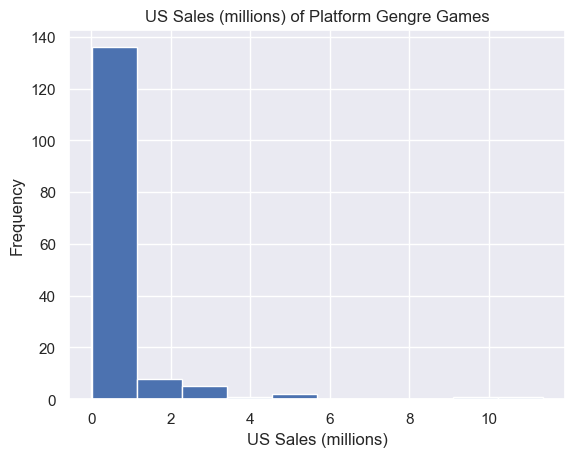

In [53]:
platform_games_sales.hist()
plt.title('US Sales (millions) of Platform Gengre Games')
plt.xlabel('US Sales (millions)')
plt.ylabel('Frequency')
plt.show()

In [54]:
action_games = df[df['Action']==1]
action_games = action_games.dropna()
action_games_sales = action_games[['US Sales (millions)']]
print(action_games_sales['US Sales (millions)'].isna().value_counts())

US Sales (millions)
False    1076
Name: count, dtype: int64


In [55]:
print(action_games_sales.head())

    US Sales (millions)
0                  4.69
2                  0.54
4                  0.45
10                 0.20
11                 0.16


In [56]:
action_games_sales.describe()

,US Sales (millions)
count,1076.000000
mean,0.519703
std,1.097890
min,0.010000
25%,0.090000
50%,0.200000
75%,0.472500
max,14.660000


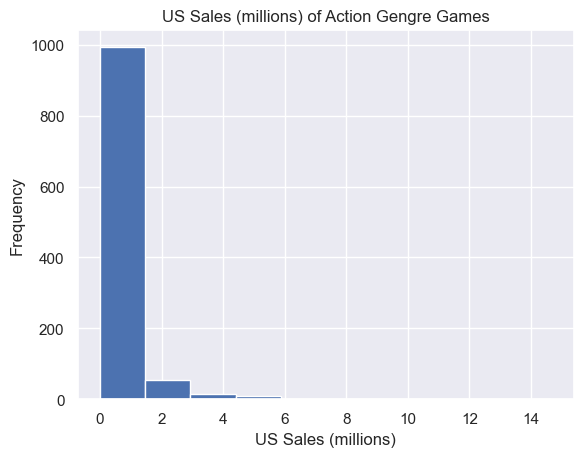

In [57]:
action_games_sales.hist()
plt.title('US Sales (millions) of Action Gengre Games')
plt.xlabel('US Sales (millions)')
plt.ylabel('Frequency')
plt.show()

For the hypothesis test, the null and alternative hypotheses are:

H0 : The median sales of the action genre are equal to the median sales of the platform genre.

H0 : Median Sales (Action) = Median Sales (Platform)

​Ha : The median sales of the action genre are greater than the median sales of the platform genre.

Ha : Median Sales (Action) > Median Sales (Platform)

We will use significance level of 0.05, since it is the most typical value.

The parameter of interest for our hypothesis test is the difference in the median sales between the Action and Platform genres. Specifically, it is the median sales value for Action games minus the median sales value for Platform games. This parameter helps determine whether there is a statistically significant difference in the central tendency of sales between these two genres.

In [58]:
median_action_games_sales = np.median(action_games_sales)
median_platform_games_sales = np.median(platform_games_sales)
median_action_games_sales, median_platform_games_sales

observed_diff = median_action_games_sales - median_platform_games_sales
print(f"Observed Difference in Medians: {observed_diff}")

Observed Difference in Medians: -0.065


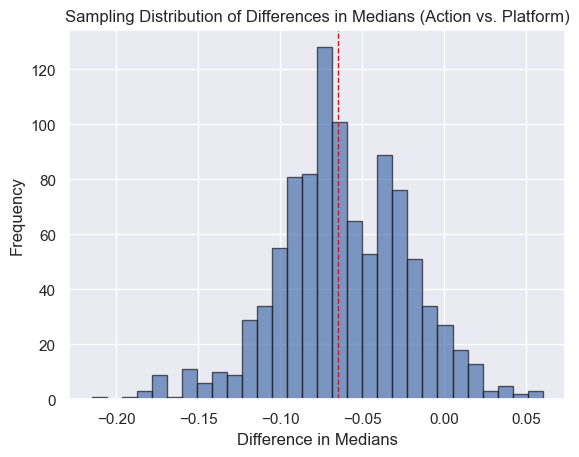

In [59]:
n_samples = 1000
sample_size_action = len(action_games_sales)
sample_size_platform = len(platform_games_sales)
sampling_diff_medians = []

for _ in range(n_samples):
    sample_action = action_games_sales.sample(n=sample_size_action, replace=True)
    sample_platform = platform_games_sales.sample(n=sample_size_platform, replace=True)
    median_sample_action = np.median(sample_action)
    median_sample_platform = np.median(sample_platform)
    diff_medians = median_sample_action - median_sample_platform
    sampling_diff_medians.append(diff_medians)

sampling_diff_medians = np.array(sampling_diff_medians)

plt.hist(sampling_diff_medians, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=1)
plt.title('Sampling Distribution of Differences in Medians (Action vs. Platform)')
plt.xlabel('Difference in Medians')
plt.ylabel('Frequency')
plt.show()

In [60]:
p_value = np.sum(sampling_diff_medians >= observed_diff) / n_samples
print(f"p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Action genre has greater median sales.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that action genre has greater median sales.")

p-value: 0.524
Fail to reject the null hypothesis: No significant evidence that action genre has greater median sales.


Conclusion:
The significance level is set at 0.05, which is a typical threshold used to determine whether the results are statistically significant. The significance level represents the probability of rejecting the null hypothesis when it is actually true. In other words, it is the probability of making a Type I error. By choosing , we are allowing a 5% risk of concluding that the Action genre has higher median sales when, in fact, there is no real difference.

The p-value calculated in our test is 0.524, which is much greater than the chosen significance level. The p-value represents the probability of obtaining an observed difference in medians (or one more extreme) if the null hypothesis is true. A p-value of 0.524 suggests that there is a 52.4% chance of observing such a difference in medians purely due to random variation if the null hypothesis is true. Since this p-value is greater than 0.05, it means that the observed difference is not statistically significant.

Since the p-value (0.524) is greater than the significance level, we fail to reject the null hypothesis. This means that we do not have enough evidence to support the claim that the median sales of the Action genre are significantly greater than the median sales of the Platform genre. In simpler terms, the data suggests that there is no significant difference between the median sales of these two genres, at least based on the sample provided.


## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion

In summary, we performed two primary analyses in this project. First, we estimated a population parameter using a confidence interval for the logical variable in our dataset. We reported the proportion for the logical variable in the dataset and constructed a confidence interval for the underlying population. The confidence interval provided a range of reasonable values for the population proportion, giving insight into its possible range of values beyond the sample.

Second, we conducted a hypothesis test to evaluate competing theories about a quantitative variable from the dataset. After cleaning the data and performing descriptive analysis, we used inferential statistics to test our hypotheses. Based on the p-value obtained from the sampling distribution, we made a decision regarding the null hypothesis and interpreted the results in the context of our research question.

However, several limitations should be acknowledged. Our dataset size and the choice of variables may have constrained the generalizability of the results. Additionally, potential biases in data collection and the need for further adjustments to variables introduced uncertainty in the analysis. These factors may affect the strength of our conclusions and the reliability of the inferences made.

For future work, further research could explore additional variables or expand the dataset to include more observations. Additional analysis could focus on refining the hypotheses or testing new ones, and more variety of methods could be applied to reduce bias and improve accuracy.